Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


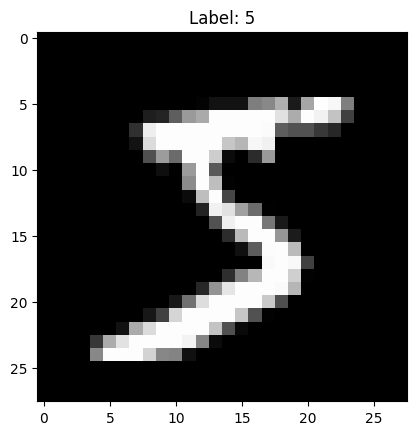

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST data from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Show a sample digit
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:
# Normalize the pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
from tensorflow.keras import models, layers


model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8559 - loss: 0.4903
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9538 - loss: 0.1521
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9670 - loss: 0.1087
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9735 - loss: 0.0859
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9785 - loss: 0.0716


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0900

Test accuracy: 0.9779999852180481


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


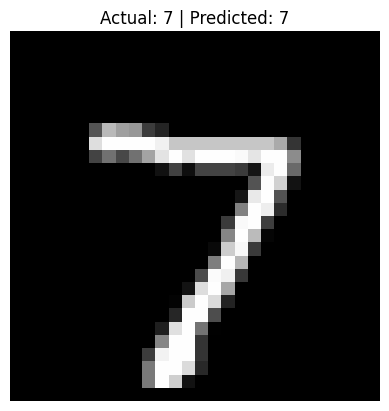

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)


def show_prediction(index):
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Actual: {y_test[index]} | Predicted: {np.argmax(predictions[index])}")
    plt.axis('off')
    plt.show()


show_prediction(0)


In [ ]:
from tensorflow.keras import models, layers

# Build CNN model
cnn_model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
cnn_model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.8080 - loss: 0.5912 - val_accuracy: 0.9843 - val_loss: 0.0512
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9586 - loss: 0.1414 - val_accuracy: 0.9863 - val_loss: 0.0457
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9686 - loss: 0.1023 - val_accuracy: 0.9892 - val_loss: 0.0402
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9774 - loss: 0.0761 - val_accuracy: 0.9905 - val_loss: 0.0403
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 30ms/step - accuracy: 0.9803 - loss: 0.0675 - val_accuracy: 0.9897 - val_loss: 0.0389


In [ ]:
cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9827 - loss: 0.0560 - val_accuracy: 0.9903 - val_loss: 0.0400
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - accuracy: 0.9852 - loss: 0.0505 - val_accuracy: 0.9925 - val_loss: 0.0324
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9850 - loss: 0.0462 - val_accuracy: 0.9920 - val_loss: 0.0384
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9912 - val_loss: 0.0401
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9885 - loss: 0.0354 - val_accuracy: 0.9907 - val_loss: 0.0461
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9874 - loss: 0.0394 - val_accuracy: 0.9905 - val_loss: 0.0447
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9897 - loss: 0.0311 - val_accuracy: 0.9927 - val_loss: 0.0403
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9907 -

In [ ]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9916 - loss: 0.0341
Test accuracy: 0.9930


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


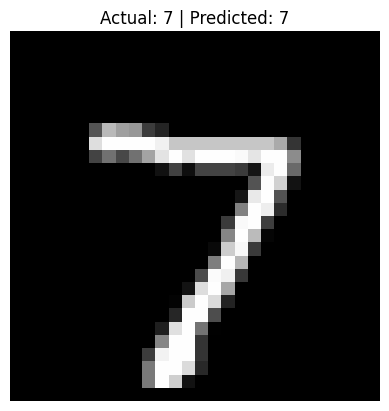

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


cnn_predictions = cnn_model.predict(x_test)


def show_cnn_prediction(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    actual = y_test[index]
    predicted = np.argmax(cnn_predictions[index])
    plt.title(f"Actual: {actual} | Predicted: {predicted}")
    plt.axis('off')
    plt.show()


show_cnn_prediction(0)


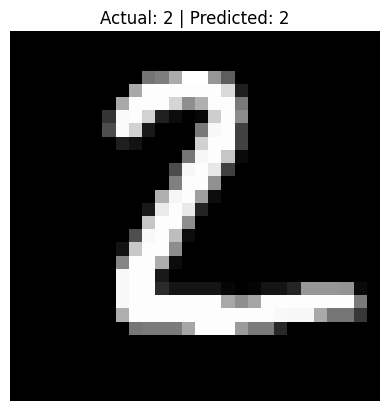

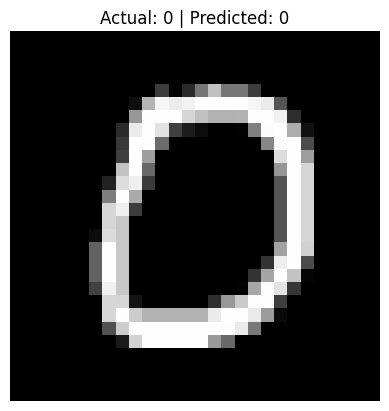

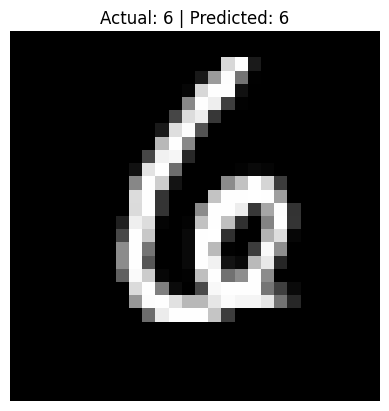

In [ ]:
show_cnn_prediction(1)
show_cnn_prediction(10)
show_cnn_prediction(123)


Index 1 → Actual: 2, Predicted: 2


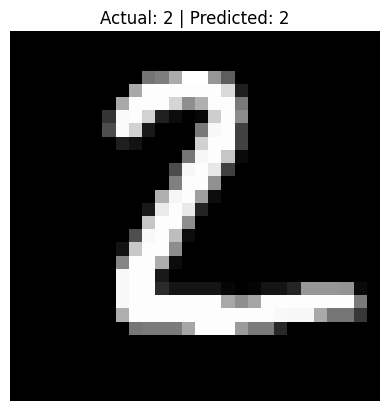

Index 10 → Actual: 0, Predicted: 0


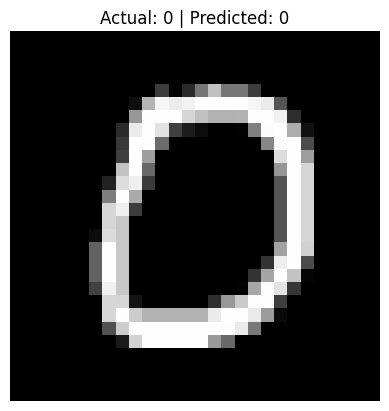

Index 123 → Actual: 6, Predicted: 6


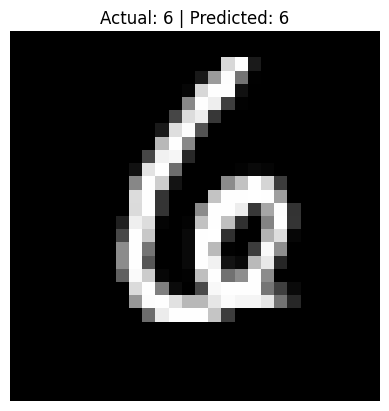

In [ ]:
for i in [1, 10, 123]:
    actual = y_test[i]
    predicted = np.argmax(cnn_predictions[i])
    print(f"Index {i} → Actual: {actual}, Predicted: {predicted}")
    show_cnn_prediction(i)


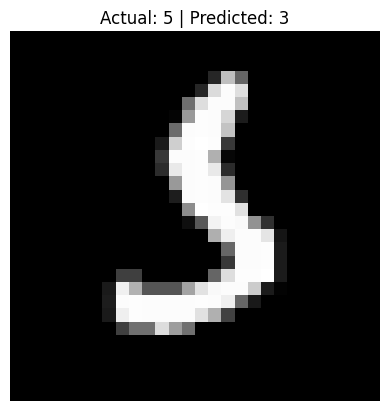

Index 340 → Actual: 5, Predicted: 3


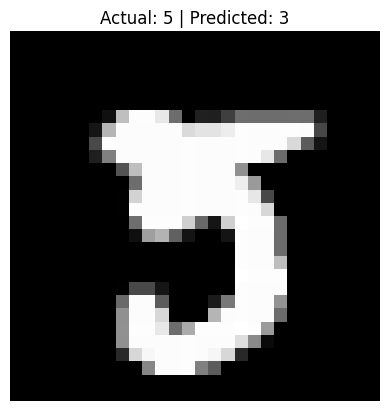

Index 412 → Actual: 5, Predicted: 3


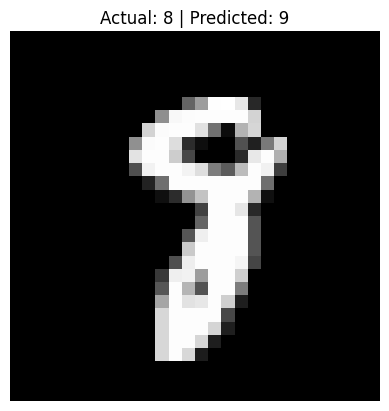

Index 435 → Actual: 8, Predicted: 9


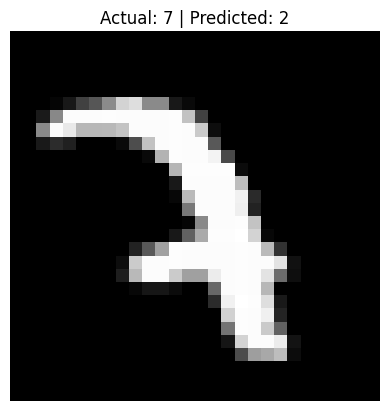

Index 684 → Actual: 7, Predicted: 2


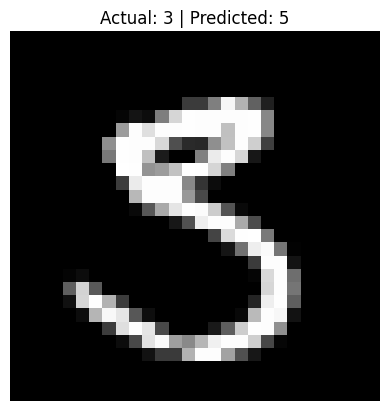

Index 938 → Actual: 3, Predicted: 5


In [ ]:
wrong = []

for i in range(len(x_test)):
    if np.argmax(cnn_predictions[i]) != y_test[i]:
        wrong.append(i)

for i in wrong[:5]:
    show_cnn_prediction(i)
    print(f"Index {i} → Actual: {y_test[i]}, Predicted: {np.argmax(cnn_predictions[i])}")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving digit.jpg to digit (1).jpg


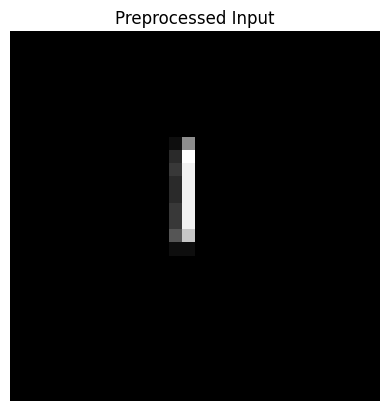

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


filename = next(iter(uploaded))

img = Image.open(filename).convert('L')

img = img.resize((28, 28))


img = np.invert(img)


img_array = np.array(img) / 255.0


img_input = img_array.reshape(1, 28, 28, 1)


plt.imshow(img_array, cmap='gray')
plt.title("Preprocessed Input")
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
from tensorflow.keras import models, layers

cnn_model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(x_train, y_train, epochs=3, validation_split=0.1)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.8260 - loss: 0.5541 - val_accuracy: 0.9840 - val_loss: 0.0526
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9631 - loss: 0.1235 - val_accuracy: 0.9865 - val_loss: 0.0448
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9703 - loss: 0.0978 - val_accuracy: 0.9892 - val_loss: 0.0357


In [ ]:
prediction = cnn_model.predict(img_input)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted Digit: 1


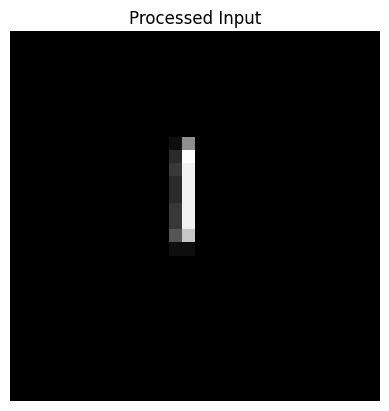

In [ ]:
plt.imshow(img_input.reshape(28, 28), cmap='gray')
plt.title("Processed Input")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving digit2.jpg to digit2.jpg


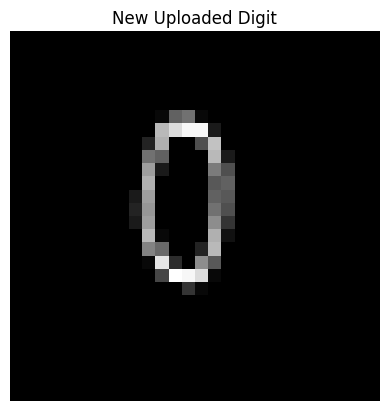

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


filename = next(iter(uploaded))
img = Image.open(filename).convert('L')
img = img.resize((28, 28))
img = np.invert(img)

img_array = np.array(img) / 255.0
img_input = img_array.reshape(1, 28, 28, 1)

plt.imshow(img_array, cmap='gray')
plt.title("New Uploaded Digit")
plt.axis('off')
plt.show()


In [ ]:
prediction = cnn_model.predict(img_input)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Digit: 0
